# Análise Exploratória de Dados - Evasão Escolar

## 1 Preparação do Ambiente

### 1.1 Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import display, HTML

### 1.2 Importação da Base de Dados

In [2]:
base = pd.read_csv('../data/raw/xAPI-Edu-Data.csv')

## 2 Descrição dos Dados

### 2.1 Dicionário de Dados

In [3]:
dicionario = pd.read_csv('../data/external/dicionario.csv')

In [4]:
dicionario

,Variavel,Significado,Tipo,Subtipo
0,gender,"Indica o gênero da pessoa (M:Masculino,F:Femin...",Qualitativa,Nominal
1,NationalITy,Indica a nacionalidade do estudante,Qualitativa,Nominal
2,PlaceofBirth,Local de nascimento do estudante,Qualitativa,Nominal
3,StageID,Segmento educacional do aluno,Qualitativa,Nominal
4,GradeID,Série que o aluno está,Qualitativa,Ordinal
5,SectionID,Classe em que o aluno está,Qualitativa,Nominal
6,Topic,Disciplina,Qualitativa,Nominal
7,Semester,Semestre em que o aluno está,Qualitativa,Ordinal
8,Relation,Parente responsavel pelo o estudante,Qualitativa,Nominal
9,raisedhands,Quantas vezes o aluno levantou a mão na aula,Quantitativa,Discreta


### 2.2 Base de Dados

In [5]:
base

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [6]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

### 2.3 Dados Faltantes

In [7]:
base.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

Não há variáveis faltantes na base de dados escolhida.

### 2.4 Valores Únicos

In [8]:
uniques = {'Variavel': dicionario['Variavel'], 'Valores': []}
for index, row in dicionario.iterrows():
    uniques['Valores'].append(base[row['Variavel']].unique())

base_uniques = pd.DataFrame.from_dict(uniques)
display(HTML(base_uniques.to_html()))

,Variavel,Valores
0,gender,"[M, F]"
1,NationalITy,"[KW, lebanon, Egypt, SaudiArabia, USA, Jordan, venzuela, Iran, Tunis, Morocco, Syria, Palestine, Iraq, Lybia]"
2,PlaceofBirth,"[KuwaIT, lebanon, Egypt, SaudiArabia, USA, Jordan, venzuela, Iran, Tunis, Morocco, Syria, Iraq, Palestine, Lybia]"
3,StageID,"[lowerlevel, MiddleSchool, HighSchool]"
4,GradeID,"[G-04, G-07, G-08, G-06, G-05, G-09, G-12, G-11, G-10, G-02]"
5,SectionID,"[A, B, C]"
6,Topic,"[IT, Math, Arabic, Science, English, Quran, Spanish, French, History, Biology, Chemistry, Geology]"
7,Semester,"[F, S]"
8,Relation,"[Father, Mum]"
9,raisedhands,"[15, 20, 10, 30, 40, 42, 35, 50, 12, 70, 19, 5, 62, 36, 55, 69, 60, 2, 0, 8, 25, 75, 4, 45, 14, 33, 7, 13, 29, 39, 49, 16, 28, 27, 21, 80, 17, 65, 22, 11, 1, 3, 100, 6, 90, 77, 24, 66, 23, 82, 72, 51, 85, 87, 95, 81, 53, 92, 83, 67, 96, 57, 73, 9, 32, 52, 59, 61, 79, 18, 74, 97, 41, 71, 98, 78, 89, 88, 86, 76, 99, 84]"


## 3 Perguntas de Partida e Hipóteses

A partir dos dados apresentados, buscamos responder as seguintes perguntas e, com isso, verificar o impacto na Evasão Escolar

- O número de faltas é maior entre o público masculino?
- Verificar a influência das respostas dos pais às pesquisas escolares com a evasão escolar;
- O gênero do responsável influencia no número de ausências?
- As notas podem influenciar na frequência dos estudantes?
- Existe alguma relação entre o segmento escolar e a frequência dos alunos?
- O país onde os estudantes vivem influencia na taxa de evasão?

## 4 Insights

### 4.1 Variáveis Qualitativas

In [26]:
#Olhando a porcentagem de todas as variaveis qualitativas
qualitativas = dicionario.query('Tipo == "Qualitativa"')['Variavel'].to_list()

#Criando o for para varrer toda a lista

for coluna in qualitativas:
    print(coluna.center(50,'='))
    display((base[coluna].value_counts()/base.shape[0])*100)
    print('\n')

======================gender======================


gender
M    63.541667
F    36.458333
Name: count, dtype: float64



===================NationalITy====================


NationalITy
KW             37.291667
Jordan         35.833333
Palestine       5.833333
Iraq            4.583333
lebanon         3.541667
Tunis           2.500000
SaudiArabia     2.291667
Egypt           1.875000
Syria           1.458333
USA             1.250000
Iran            1.250000
Lybia           1.250000
Morocco         0.833333
venzuela        0.208333
Name: count, dtype: float64



===================PlaceofBirth===================


PlaceofBirth
KuwaIT         37.500000
Jordan         36.666667
Iraq            4.583333
lebanon         3.958333
SaudiArabia     3.333333
USA             3.333333
Palestine       2.083333
Egypt           1.875000
Tunis           1.875000
Iran            1.250000
Syria           1.250000
Lybia           1.250000
Morocco         0.833333
venzuela        0.208333
Name: count, dtype: float64



=====================StageID======================


StageID
MiddleSchool    51.666667
lowerlevel      41.458333
HighSchool       6.875000
Name: count, dtype: float64



=====================GradeID======================


GradeID
G-02    30.625000
G-08    24.166667
G-07    21.041667
G-04    10.000000
G-06     6.666667
G-11     2.708333
G-12     2.291667
G-09     1.041667
G-10     0.833333
G-05     0.625000
Name: count, dtype: float64



====================SectionID=====================


SectionID
A    58.958333
B    34.791667
C     6.250000
Name: count, dtype: float64



======================Topic=======================


Topic
IT           19.791667
French       13.541667
Arabic       12.291667
Science      10.625000
English       9.375000
Biology       6.250000
Spanish       5.208333
Chemistry     5.000000
Geology       5.000000
Quran         4.583333
Math          4.375000
History       3.958333
Name: count, dtype: float64



=====================Semester=====================


Semester
F    51.041667
S    48.958333
Name: count, dtype: float64



=====================Relation=====================


Relation
Father    58.958333
Mum       41.041667
Name: count, dtype: float64



==============ParentAnsweringSurvey===============


ParentAnsweringSurvey
Yes    56.25
No     43.75
Name: count, dtype: float64



=============ParentschoolSatisfaction=============


ParentschoolSatisfaction
Good    60.833333
Bad     39.166667
Name: count, dtype: float64



================StudentAbsenceDays================


StudentAbsenceDays
Under-7    60.208333
Above-7    39.791667
Name: count, dtype: float64



======================Class=======================


Class
M    43.958333
H    29.583333
L    26.458333
Name: count, dtype: float64

**Conclusões iniciais**
- 63% dos alunos são homens
- Mais de 70% dos alunos tem nacionalidade no kwait e da jordania
- Mais de 70% dos alunos tem local de nascimento no kwait e na jordania
- Mais de 90% dos alunos estão no low level ou middle school
- Mais de 90% estão nas salas A e B
- Mais de 50% dos alunos estão nas disciplinas de (It,French,Arabic, Science)
- Mais de 50% dos responsaveis são homens
- Mais de 50% dos pais respoderam o questionario e acham a escola boa
- 60% dos alunos tem numero de faltas abaixo de 7 dias
- Mais de 70% dos alunos tem notas nas catégorias middle e high
- Apenas 53 alunos cujo responsável é a mãe (Mum) tem faltas acima de 7 (Above-7), enquanto que 138 alunos tem como responsável o pai (Father)
- O número de alunos com menos de 7 faltas (Under-7) é próximo para ambos os responsáveis (145 - pai, 144 - mãe)

#### 4.1.1 Frequência dos estudantes

Antes de analisarmos outras variáveis, podemos verificar a distribuição da frequencia dos estudantes a partir da variável `StudentAbsenceDays`

In [10]:
# Filtrar apenas as linhas onde 'StudentAbsenceDays' é 'Above-7' ou 'Under-7'
filtered_base = base[base['StudentAbsenceDays'].isin(['Above-7', 'Under-7'])]

# Criar a tabela de frequência cruzada para 'StudentAbsenceDays'
absence_ausencia = pd.crosstab(index=filtered_base['StudentAbsenceDays'], columns='Contagem')

# Calcular a porcentagem de cada resultado e arredondar para zero casas decimais
porcentagem_relacao = (absence_ausencia / absence_ausencia.sum() * 100).round(0).astype(int)

# Renomear a coluna
porcentagem_relacao.columns = [' ']

# Incluindo as porcentagens em parênteses ao lado dos valores
for col in porcentagem_relacao.columns:
    porcentagem_relacao[col] = ' (' + porcentagem_relacao[col].astype(str) + '%)'

print(porcentagem_relacao)

                          
StudentAbsenceDays        
Above-7              (40%)
Under-7              (60%)


#### 4.1.2 Distribuição por gênero

Podemos analisar a variável `gender` para identificar se há alguma tendência de maior ausência em um gênero específico.

In [11]:
#Criando relação entre o gênero do estudante e a evasão
gender_ausencia = pd.crosstab(index=base['gender'], columns=base['StudentAbsenceDays'])

#Calculando a porcentagem de cada resultado
porcentagem_relacao2 = (gender_ausencia.div(gender_ausencia.sum(axis=1), axis=0) * 100).round(0).astype(int)

#Incluindo as porcentagens em parênteses ao lado dos valores
for col in porcentagem_relacao2.columns:
    porcentagem_relacao2[col] = gender_ausencia[col].astype(str) + ' (' + porcentagem_relacao2[col].astype(str) + '%)'


print(porcentagem_relacao2)

StudentAbsenceDays    Above-7    Under-7
gender                                  
F                    46 (26%)  129 (74%)
M                   145 (48%)  160 (52%)


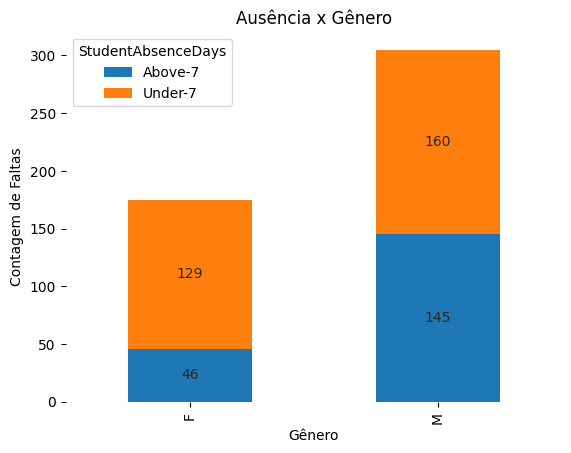

In [12]:
#Representando essa relação graficamente
ax = gender_ausencia.plot(kind='bar', stacked=True)

#Utilizando Linhas Verticais
sns.set_style("whitegrid")

#Removendo Bordas e Adicionando Linha de Origem
ax.set(frame_on=False)

#Ajustando Título e Labels
plt.xlabel('Gênero')
plt.ylabel('Contagem de Faltas')
plt.title('Ausência x Gênero')

#Valores dentro das barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

Observa-se que os estudantes do sexo masculino tendem a ter uma taxa de faltas mais elevada, visto que 48% deles apresentam uma frequência acima de 7 faltas. Em contraste, ao analisar os estudantes do sexo feminino, esse percentual cai para 26%.

#### 4.1.3 Distribuição por participação dos pais

Iniciaremos nossa análise investigando como o apoio e a participação ativa dos pais podem influenciar, por meio da correlação entre a variável `ParentAnsweringSurvey` e `StudentAbsenceDays`

In [13]:
#Criando relação entre o responsável e a evasão
answer_ausencia = pd.crosstab(index=base['ParentAnsweringSurvey'], columns=base['StudentAbsenceDays'])

#Calculando a porcentagem de cada resultado
porcentagem_parentAnswer = (answer_ausencia.div(answer_ausencia.sum(axis=1), axis=0) * 100).round(0).astype(int)

#Incluindo as porcentagens em parênteses ao lado dos valores
for col in porcentagem_parentAnswer.columns:
    porcentagem_parentAnswer[col] = answer_ausencia[col].astype(str) + ' (' + porcentagem_parentAnswer[col].astype(str) + '%)'

print(porcentagem_parentAnswer)

StudentAbsenceDays       Above-7    Under-7
ParentAnsweringSurvey                      
No                     114 (54%)   96 (46%)
Yes                     77 (29%)  193 (71%)


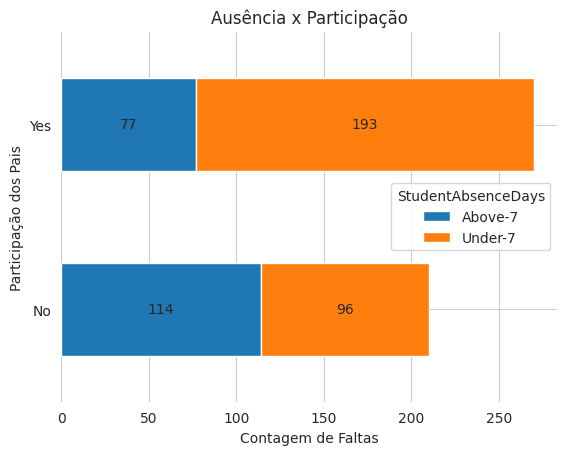

In [14]:
#sns.countplot(data = base,x='ParentAnsweringSurvey',hue='StudentAbsenceDays')
#Representando essa relação graficamente
ax = answer_ausencia.plot(kind='barh', stacked=True)

#Utilizando Linhas Verticais
sns.set_style("whitegrid")

#Removendo Bordas
ax.set(frame_on=False)

#Ajustando Título e Labels
plt.xlabel('Contagem de Faltas')
plt.ylabel('Participação dos Pais')
plt.title('Ausência x Participação')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{width:.0f}', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

É notório que a maioria expressiva dos estudantes mantém uma frequência escolar mais constante quando seus pais estão ativamente envolvidos em suas vidas acadêmicas. Isso fica evidente ao observar que quando os pais participam da vida acadêmica, apenas 29% dos alunos têm mais de 7 faltas, em contraste com os 54% quando os pais não participam.

#### 4.1.4 Distribuição por gênero dos pais

Esse tópico busca compreender se existe uma correlação significativa entre o gênero dos responsáveis (sejam eles pais, mães ou outros responsáveis legais) e a quantidade de faltas dos estudantes, relacionando as variáveis `Relation` e `StudentAbsenceDays`

In [15]:
#Criando relação entre o responsável e a evasão
resp_ausencia = pd.crosstab(index=base['Relation'], columns=base['StudentAbsenceDays'])

#Calculando a porcentagem de cada resultado
porcentagem_relacao1 = (resp_ausencia.div(resp_ausencia.sum(axis=1), axis=0) * 100).round(0).astype(int)

#Incluindo as porcentagens em parênteses ao lado dos valores
for col in porcentagem_relacao1.columns:
    porcentagem_relacao1[col] = resp_ausencia[col].astype(str) + ' (' + porcentagem_relacao1[col].astype(str) + '%)'

print(porcentagem_relacao1)

StudentAbsenceDays    Above-7    Under-7
Relation                                
Father              138 (49%)  145 (51%)
Mum                  53 (27%)  144 (73%)


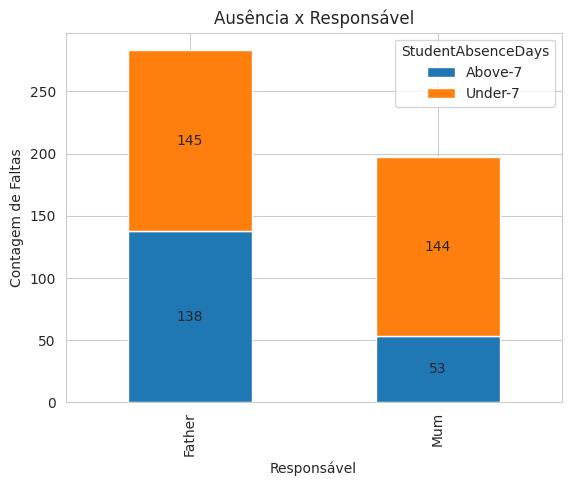

In [16]:
#Representando essa relação graficamente
ax = resp_ausencia.plot(kind='bar', stacked=True)

plt.xlabel('Responsável')
plt.ylabel('Contagem de Faltas')
plt.title('Ausência x Responsável')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

É notável que, quando a mãe assume a responsabilidade, os estudantes têm uma tendência mais forte de frequentar regularmente as aulas. Isso se evidencia pelo fato de que 73% dos estudantes mantêm uma frequência inferior a 7 faltas quando acompanhados por suas mães, em contraste com os 51% quando a responsabilidade recai sobre os pais.

#### 4.1.5 Distribuição por notas escolares

Podemos analisar a variável `Class` em relação à `StudentAbsenceDays` para verificar a relação entre a evasão dos alunos e a média de notas.

In [17]:
#Criando relação entre a disciplina e a evasão
notas_ausencia = pd.crosstab(index=base['Class'], columns=base['StudentAbsenceDays'])

#Calculando a porcentagem de cada resultado
porcentagem_relacao10 = (notas_ausencia.div(notas_ausencia.sum(axis=1), axis=0) * 100).round(0).astype(int)

#Incluindo as porcentagens em parênteses ao lado dos valores
for col in porcentagem_relacao10.columns:
    porcentagem_relacao10[col] = notas_ausencia[col].astype(str) + ' (' + porcentagem_relacao10[col].astype(str) + '%)'


print(porcentagem_relacao10)

StudentAbsenceDays    Above-7    Under-7
Class                                   
H                      4 (3%)  138 (97%)
L                   116 (91%)    11 (9%)
M                    71 (34%)  140 (66%)


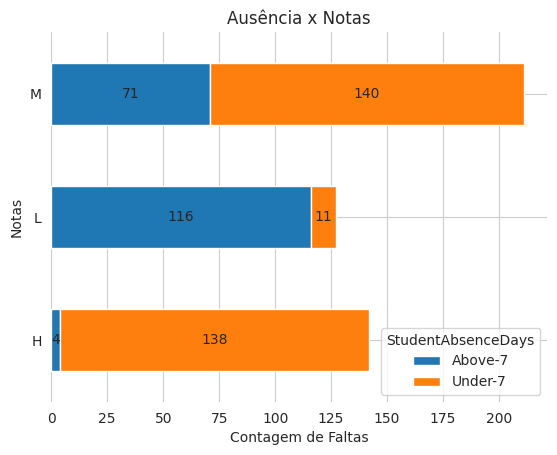

In [18]:
#Representando essa relação graficamente
ax = notas_ausencia.plot(kind='barh', stacked=True)

#Utilizando Linhas Verticais
sns.set_style("whitegrid")

#Removendo Bordas e Adicionando Linha de Origem
ax.set(frame_on=False)

#Ajustando Título e Labels
plt.xlabel('Contagem de Faltas')
plt.ylabel('Notas')
plt.title('Ausência x Notas')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{width:.0f}', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

É possível verificar que os alunos cuja média de notas é alta (`H`) tem uma forte tendência à faltar menos de 7 dias, enquanto que alunos com a média de notas baixa (`L`) tem a tendência inversa (evasão superior à 7 dias). Portanto, é possível interpretar que a média influencia diretamente na evasão: médias altas motivam alunos à faltarem menos, enquanto que médias baixas desmotivam os alunos à seguir indo nas aulas.

#### 4.1.6 Distribuição por segmento 

Podemos analisar a variável `StageID` em relação à `StudentAbsenceDays` para verificar a relação entre a evasão dos alunos e o segmento escolar.

In [19]:
#Criando relação entre o segmento do estudante e a evasão
segment_ausencia = pd.crosstab(index=base['StageID'], columns=base['StudentAbsenceDays'])

#Calculando a porcentagem de cada resultado
porcentagem_relacao3 = (segment_ausencia.div(segment_ausencia.sum(axis=1), axis=0) * 100).round(0).astype(int)

#Incluindo as porcentagens em parênteses ao lado dos valores
for col in porcentagem_relacao3.columns:
    porcentagem_relacao3[col] = segment_ausencia[col].astype(str) + ' (' + porcentagem_relacao3[col].astype(str) + '%)'


print(porcentagem_relacao3)

StudentAbsenceDays   Above-7    Under-7
StageID                                
HighSchool          11 (33%)   22 (67%)
MiddleSchool        87 (35%)  161 (65%)
lowerlevel          93 (47%)  106 (53%)


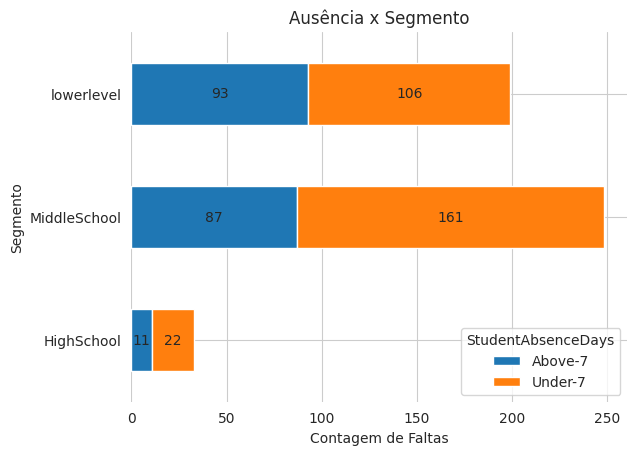

In [20]:
#Representando essa relação graficamente
ax = segment_ausencia.plot(kind='barh', stacked=True)

#Utilizando Linhas Verticais
sns.set_style("whitegrid")

#Removendo Bordas e Adicionando Linha de Origem
ax.set(frame_on=False)

#Ajustando Título e Labels
plt.xlabel('Contagem de Faltas')
plt.ylabel('Segmento')
plt.title('Ausência x Segmento')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{width:.0f}', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

Por conta de caracteristicas da própria base de dados, em que temos uma amostra muito pequena de alunos no Ensino Médio (High School), não conseguimos constatar se a tendência observada nos demais níveis se mantém.

#### 4.1.7 Distribuição por país

Podemos analisar a variável `PlaceofBirth` em relação à `StudentAbsenceDays` para verificar se o país onde o estudante vive influencia na taxa da sua frequência.

In [21]:
#Criando relação entre a disciplina e a evasão
topic_country = pd.crosstab(index=base['PlaceofBirth'], columns=base['StudentAbsenceDays'])

#Calculando a porcentagem de cada resultado
porcentagem_relacao5 = (topic_country.div(topic_country.sum(axis=1), axis=0) * 100).round(0).astype(int)

#Incluindo as porcentagens em parênteses ao lado dos valores
for col in porcentagem_relacao5.columns:
    porcentagem_relacao5[col] = topic_country[col].astype(str) + ' (' + porcentagem_relacao5[col].astype(str) + '%)'


print(porcentagem_relacao5)

StudentAbsenceDays   Above-7    Under-7
PlaceofBirth                           
Egypt                4 (44%)    5 (56%)
Iran                 4 (67%)    2 (33%)
Iraq                 6 (27%)   16 (73%)
Jordan              71 (40%)  105 (60%)
KuwaIT              82 (46%)   98 (54%)
Lybia               6 (100%)     0 (0%)
Morocco              1 (25%)    3 (75%)
Palestine             0 (0%)  10 (100%)
SaudiArabia          6 (38%)   10 (62%)
Syria                2 (33%)    4 (67%)
Tunis                3 (33%)    6 (67%)
USA                  4 (25%)   12 (75%)
lebanon              2 (11%)   17 (89%)
venzuela              0 (0%)   1 (100%)


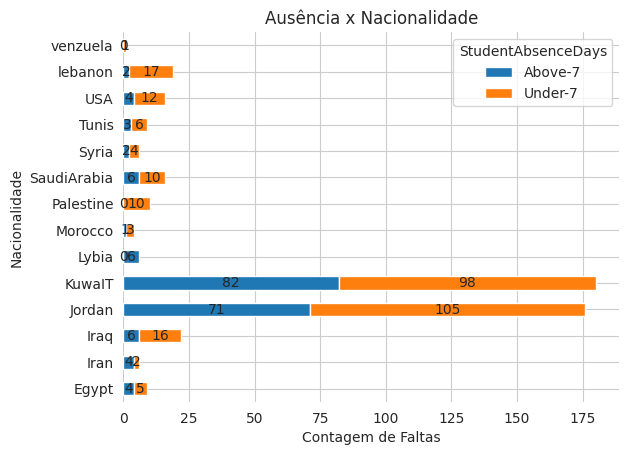

In [22]:
#Representando essa relação graficamente
ax = topic_country.plot(kind='barh', stacked=True)

#Utilizando Linhas Verticais
sns.set_style("whitegrid")

#Removendo Bordas e Adicionando Linha de Origem
ax.set(frame_on=False)

#Ajustando Título e Labels
plt.xlabel('Contagem de Faltas')
plt.ylabel('Nacionalidade')
plt.title('Ausência x Nacionalidade')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{width:.0f}', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

Após analisarmos os dados, concluímos que a influência dos pais na frequência escolar não é tão significativa quanto se imaginava.

### 4.2 Variáveis Quantitativas

===================raisedhands====================


count    480.000000
mean      46.775000
std       30.779223
min        0.000000
25%       15.750000
50%       50.000000
75%       75.000000
max      100.000000
Name: raisedhands, dtype: float64



=================VisITedResources=================


count    480.000000
mean      54.797917
std       33.080007
min        0.000000
25%       20.000000
50%       65.000000
75%       84.000000
max       99.000000
Name: VisITedResources, dtype: float64



================AnnouncementsView=================


count    480.000000
mean      37.918750
std       26.611244
min        0.000000
25%       14.000000
50%       33.000000
75%       58.000000
max       98.000000
Name: AnnouncementsView, dtype: float64



====================Discussion====================


count    480.000000
mean      43.283333
std       27.637735
min        1.000000
25%       20.000000
50%       39.000000
75%       70.000000
max       99.000000
Name: Discussion, dtype: float64

array([[<Axes: title={'center': 'raisedhands'}>,
        <Axes: title={'center': 'VisITedResources'}>],
       [<Axes: title={'center': 'AnnouncementsView'}>,
        <Axes: title={'center': 'Discussion'}>]], dtype=object)

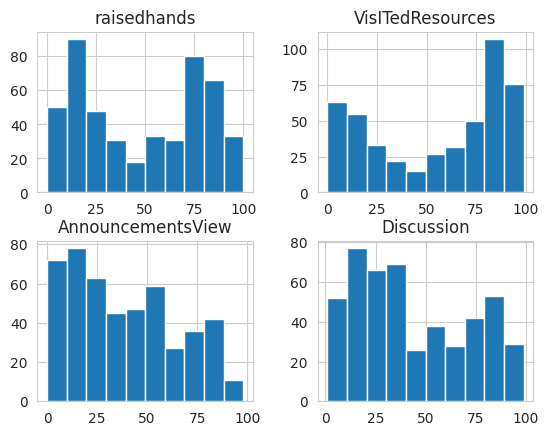

In [25]:
#Olhando a porcentagem de todas as variaveis qualitativas
quantitativas = dicionario.query('Tipo == "Quantitativa"')['Variavel'].to_list()

#Criando o for para varrer toda a lista

for coluna in quantitativas:
    print(coluna.center(50,'='))
    display(base[coluna].describe())
    print('\n')
    
#Olhando os histograma
base[quantitativas].hist()

- Ao analisar a variável `raisedhands`, observamos uma ampla distribuição de dados, o que nos leva à conclusão de que os estudantes podem ter uma participação ativa levantando a mão em frequência variável, seja ela baixa ou alta.
- Ao analisar a variável `VisiTedResources`, notamos uma distribuição diversificada de dados. Isso nos leva à conclusão de que os estudantes podem ter uma participação variável ao acessar os recursos disponíveis, independentemente de ser baixa ou alta.
- Ao analisar a variável `AnnouncementsView`, notamos que os dados apresentam uma tendência de queda mais acentuada do que de aumento. Isso sugere que uma parcela considerável dos alunos não acessa regularmente os anúncios, enquanto uma minoria o faz.
- Ao analisar a variável `Discussion`, também observamos uma tendência de queda mais pronunciada nos dados em comparação com o aumento. Isso sugere que uma parcela considerável dos alunos participa menos das discussões no ambiente escolar, enquanto uma minoria se envolve mais ativamente."

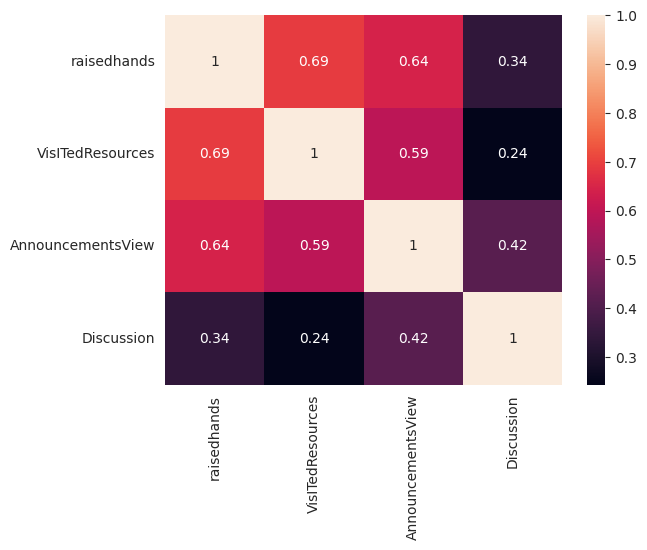

In [24]:
#Olhando correlação entre as variáveis
corrquant = base[quantitativas].corr()
sns.heatmap(corrquant, annot=True)

plt.show()

Como percebido no gráfico de calor acima, existe baixa correlação entre as variáveis quantitativas. Além disso, ficou perceptível a não-usabilidade das variáveis quantitativas para explicar o modelo e a base de dados.